In [1]:
LANGUAGES = (
    'python',
    'java',
    'ruby',
    'javascript',
    'go',
    'c',
    'csharp',
    'php'
)

In [5]:
import pickle

recall_languages = {}
for l in LANGUAGES:
    path = f'../transfer/{l}_{l}.log'
    with open(path, 'rb') as f:
        data = pickle.load(f)
    recall_languages[l] = data['recall_nonterminals']

In [39]:
from plotnine import ggplot, aes, geom_bar, labs, coord_flip, theme
import pandas as pd

def create_barplot(data_dict):
    keys = list(data_dict.keys())
    values = list(data_dict.values())

    df = pd.DataFrame({'Keys': keys, 'Values': values})
    df = df.sort_values('Values',  ascending=False).reset_index()

    plot = (
        ggplot(df, aes(x='reorder(Keys, Values)', y='Values'))
        + geom_bar(stat='identity') + coord_flip()
        + labs(x='Keys', y='Values', title='Bar Plot')
         + theme(figure_size=(10, 8))
    )

    print(plot)

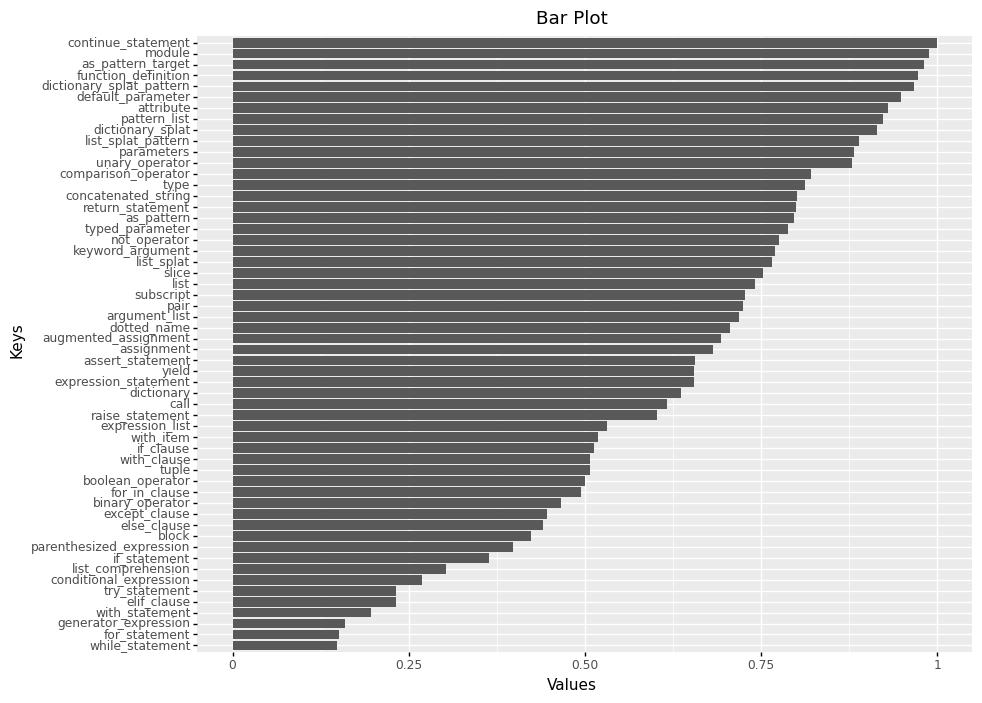

In [50]:
import numpy as np

min_snippets = 100
l = 'python'

recalls = recall_languages[l]
sizes = {x: len(y) for x, y in recalls.items()}
means = {x: np.mean(y) for x, y in recalls.items() if sizes[x] >= min_snippets}
create_barplot(means)

In [48]:
path = f'../runs/multilingual_CodeBERT/metrics_just_test.log'
with open(path, 'rb') as f:
    data = pickle.load(f)
multi = data['recall_nonterminals']

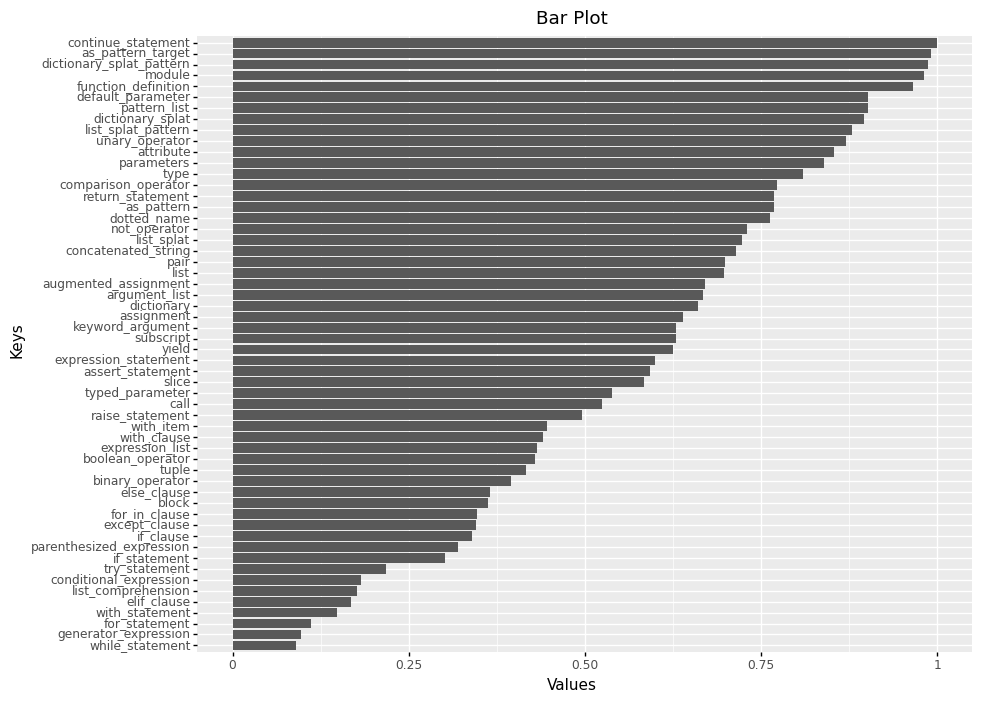

In [51]:
min_snippets = 100
l = 'python'

recalls = {x.split('--')[0]: y for x, y in multi.items() if f'--{l}' in x}
sizes = {x: len(y) for x, y in recalls.items()}
means = {x: np.mean(y) for x, y in recalls.items() if sizes[x] >= min_snippets}
create_barplot(means)